# Exploratory Data Analysis

# Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


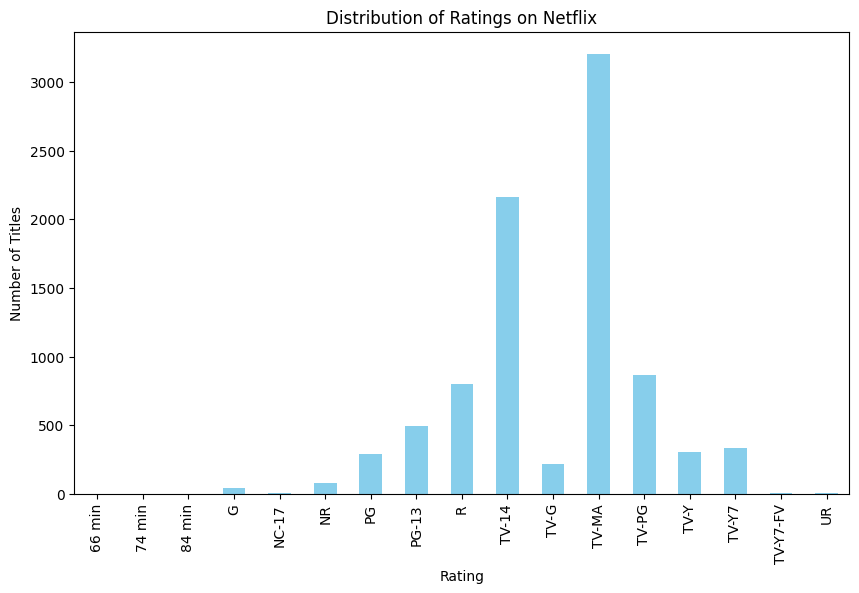

In [4]:
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# Data Clean

In [5]:
#Unnesting listed_in column:
listed_constraint = df['listed_in'].apply(lambda x: str(x).split(", ")).tolist()
df1 = pd.DataFrame(listed_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Genre'}, inplace=True)
df1 = df1.drop(['level_1'], axis=1)
df1.head(20)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [6]:
#Unnesting "country" column:
country_constraint = df['country'].apply(lambda x: str(x).split(", ")).tolist()
df2 = pd.DataFrame(country_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Country'}, inplace=True)
df2 = df2.drop(['level_1'], axis=1)
df2.head(20)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [7]:
#Unnesting "director" column
dir_constraint = df['director'].apply(lambda x: str(x).split(", ")).tolist()
df3 = pd.DataFrame(dir_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Director'}, inplace=True)
df3 = df3.drop(['level_1'], axis=1)
df3.head(20)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [8]:
#Unnesting "cast" column
cast_constraint = df['cast'].apply(lambda x: str(x).split(", ")).tolist()
df4 = pd.DataFrame(cast_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Actor'}, inplace=True)
df4 = df4.drop(['level_1'], axis=1)
df4.head(20)

,title,Actor
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


In [9]:
#Collate all the unnnested dataframes
df5 = df2.merge(df1,on=['title'],how='inner')
df6 = df5.merge(df3,on=['title'],how='inner')
df7 = df6.merge(df4,on=['title'],how='inner')
df7.head()

,title,Country,Genre,Director,Actor
0,Dick Johnson Is Dead,United States,Documentaries,Kirsten Johnson,nan
1,Blood & Water,South Africa,International TV Shows,nan,Ama Qamata
2,Blood & Water,South Africa,International TV Shows,nan,Khosi Ngema
3,Blood & Water,South Africa,International TV Shows,nan,Gail Mabalane
4,Blood & Water,South Africa,International TV Shows,nan,Thabang Molaba


In [10]:
#Merge unnested data with the entire dataframe
df_merge = df7.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_merge.head()

,title,Country,Genre,Director,Actor,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,United States,Documentaries,Kirsten Johnson,nan,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,South Africa,International TV Shows,nan,Ama Qamata,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,South Africa,International TV Shows,nan,Khosi Ngema,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,South Africa,International TV Shows,nan,Gail Mabalane,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,South Africa,International TV Shows,nan,Thabang Molaba,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


# Time Series Analysis 

## 1. Release Volume Over Years

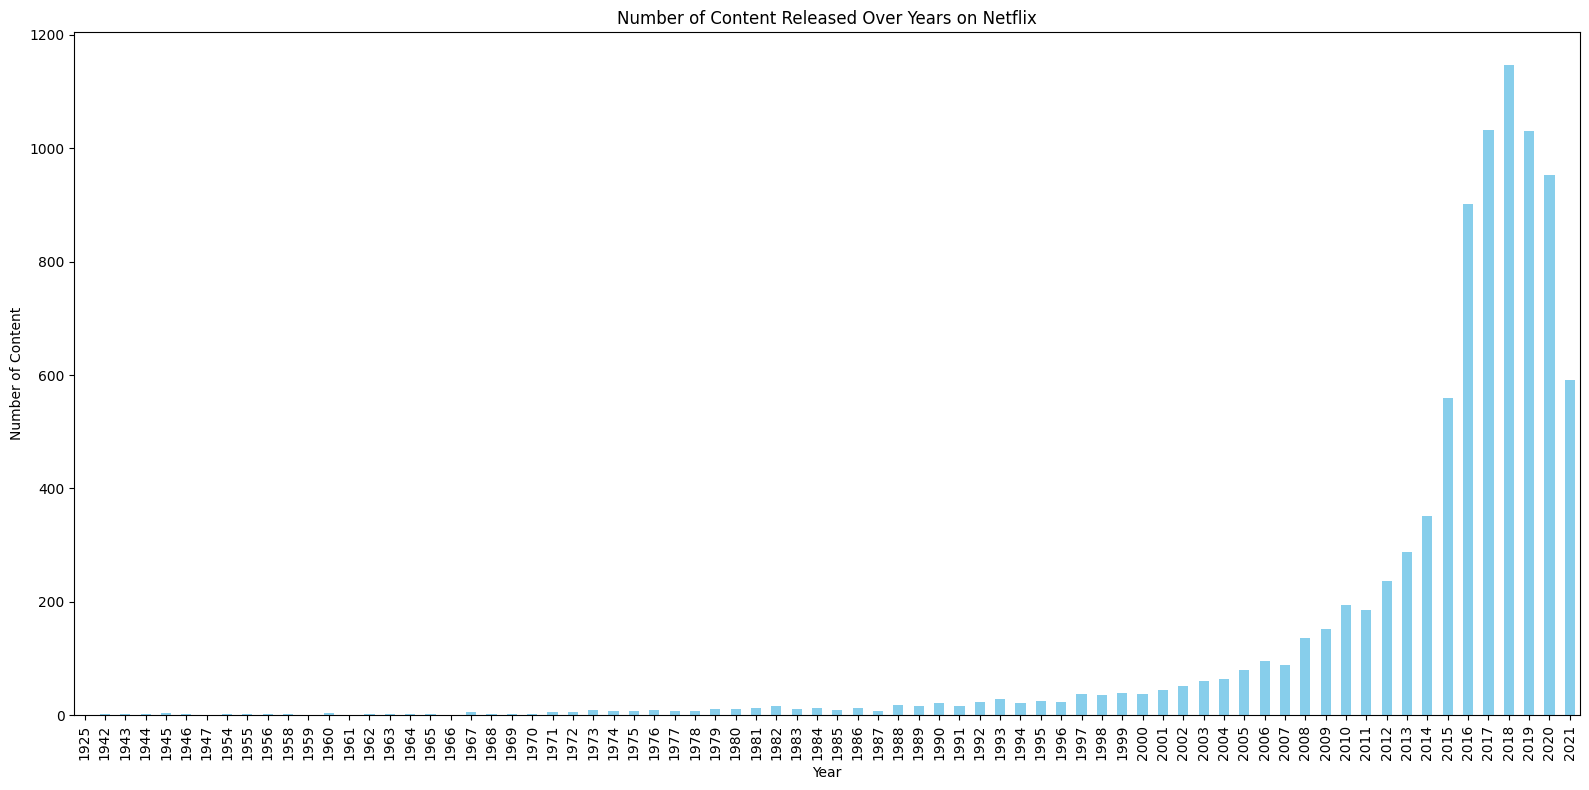

In [11]:
# Group by release_year and count the titles
yearly_content_counts = df.groupby('release_year').size()

# Plotting
plt.figure(figsize=(16, 8))
yearly_content_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Content Released Over Years on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.tight_layout()
plt.show()

## 2. Movie vs. TV Shows Over Years 

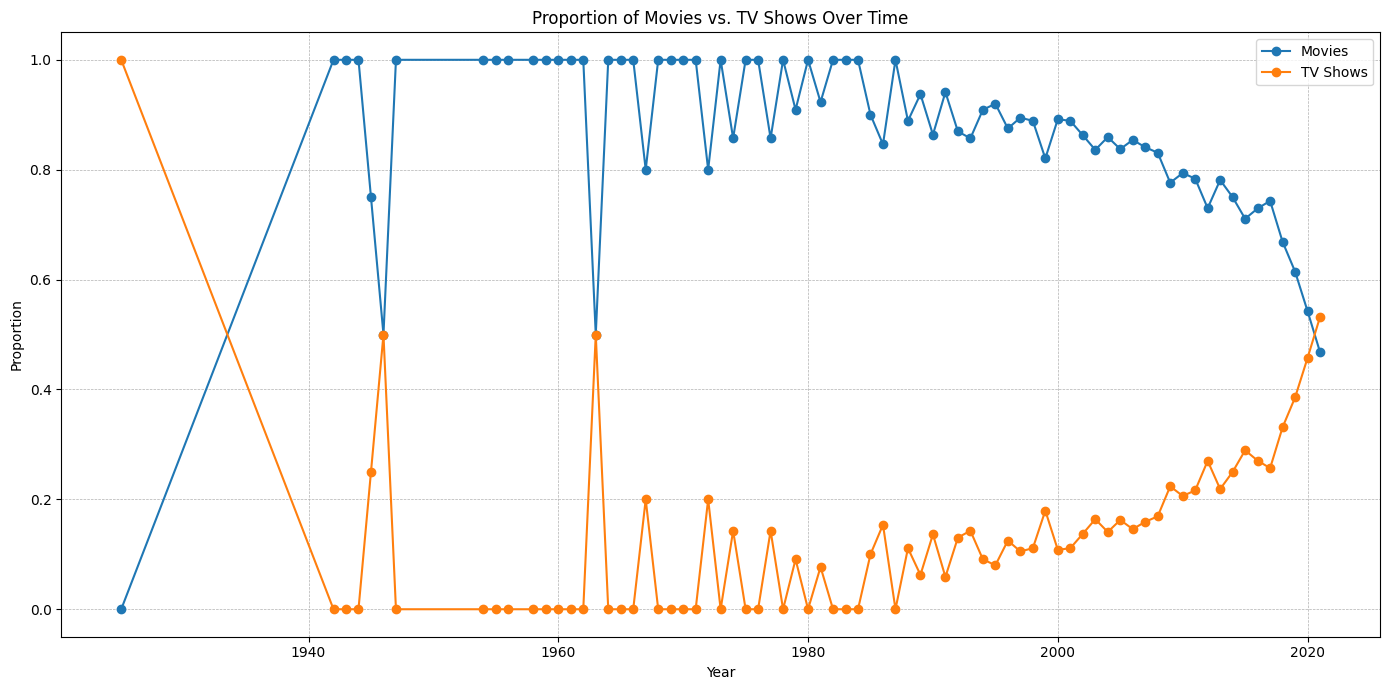

In [14]:
# Group by release_year and type, then count
yearly_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivot the data
pivot_counts = yearly_counts.pivot(index='release_year', columns='type', values='count').fillna(0)

# Calculate proportions
pivot_counts['total'] = pivot_counts.sum(axis=1)
pivot_counts['Movie_prop'] = pivot_counts['Movie'] / pivot_counts['total']
pivot_counts['Show_prop'] = pivot_counts['TV Show'] / pivot_counts['total']

index_array = np.array(pivot_counts.index)
movie_prop_array = np.array(pivot_counts['Movie_prop'])
show_prop_array = np.array(pivot_counts['Show_prop'])

# Plot
plt.figure(figsize=(14, 7))
plt.plot(index_array, movie_prop_array, label='Movies', marker='o')
plt.plot(index_array, show_prop_array, label='TV Shows', marker='o')
#plt.plot(pivot_counts.index, pivot_counts['Movie_prop'], label='Movies', marker='o')
#plt.plot(pivot_counts.index, pivot_counts['Show_prop'], label='TV Shows', marker='o')
plt.title('Proportion of Movies vs. TV Shows Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## 3. Content Age Over Years 

<AxesSubplot:xlabel='year_added'>

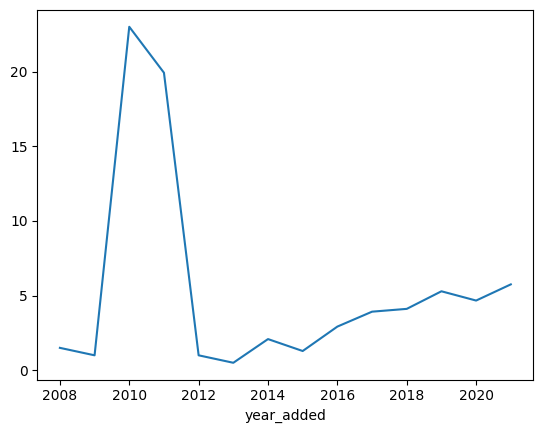

In [17]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Calculate content lifespan
df['content_age'] = df['year_added'] - df['release_year']
df.groupby('year_added')['content_age'].mean().plot(kind='line')

## 4. Seasonal Variations in Content Genre

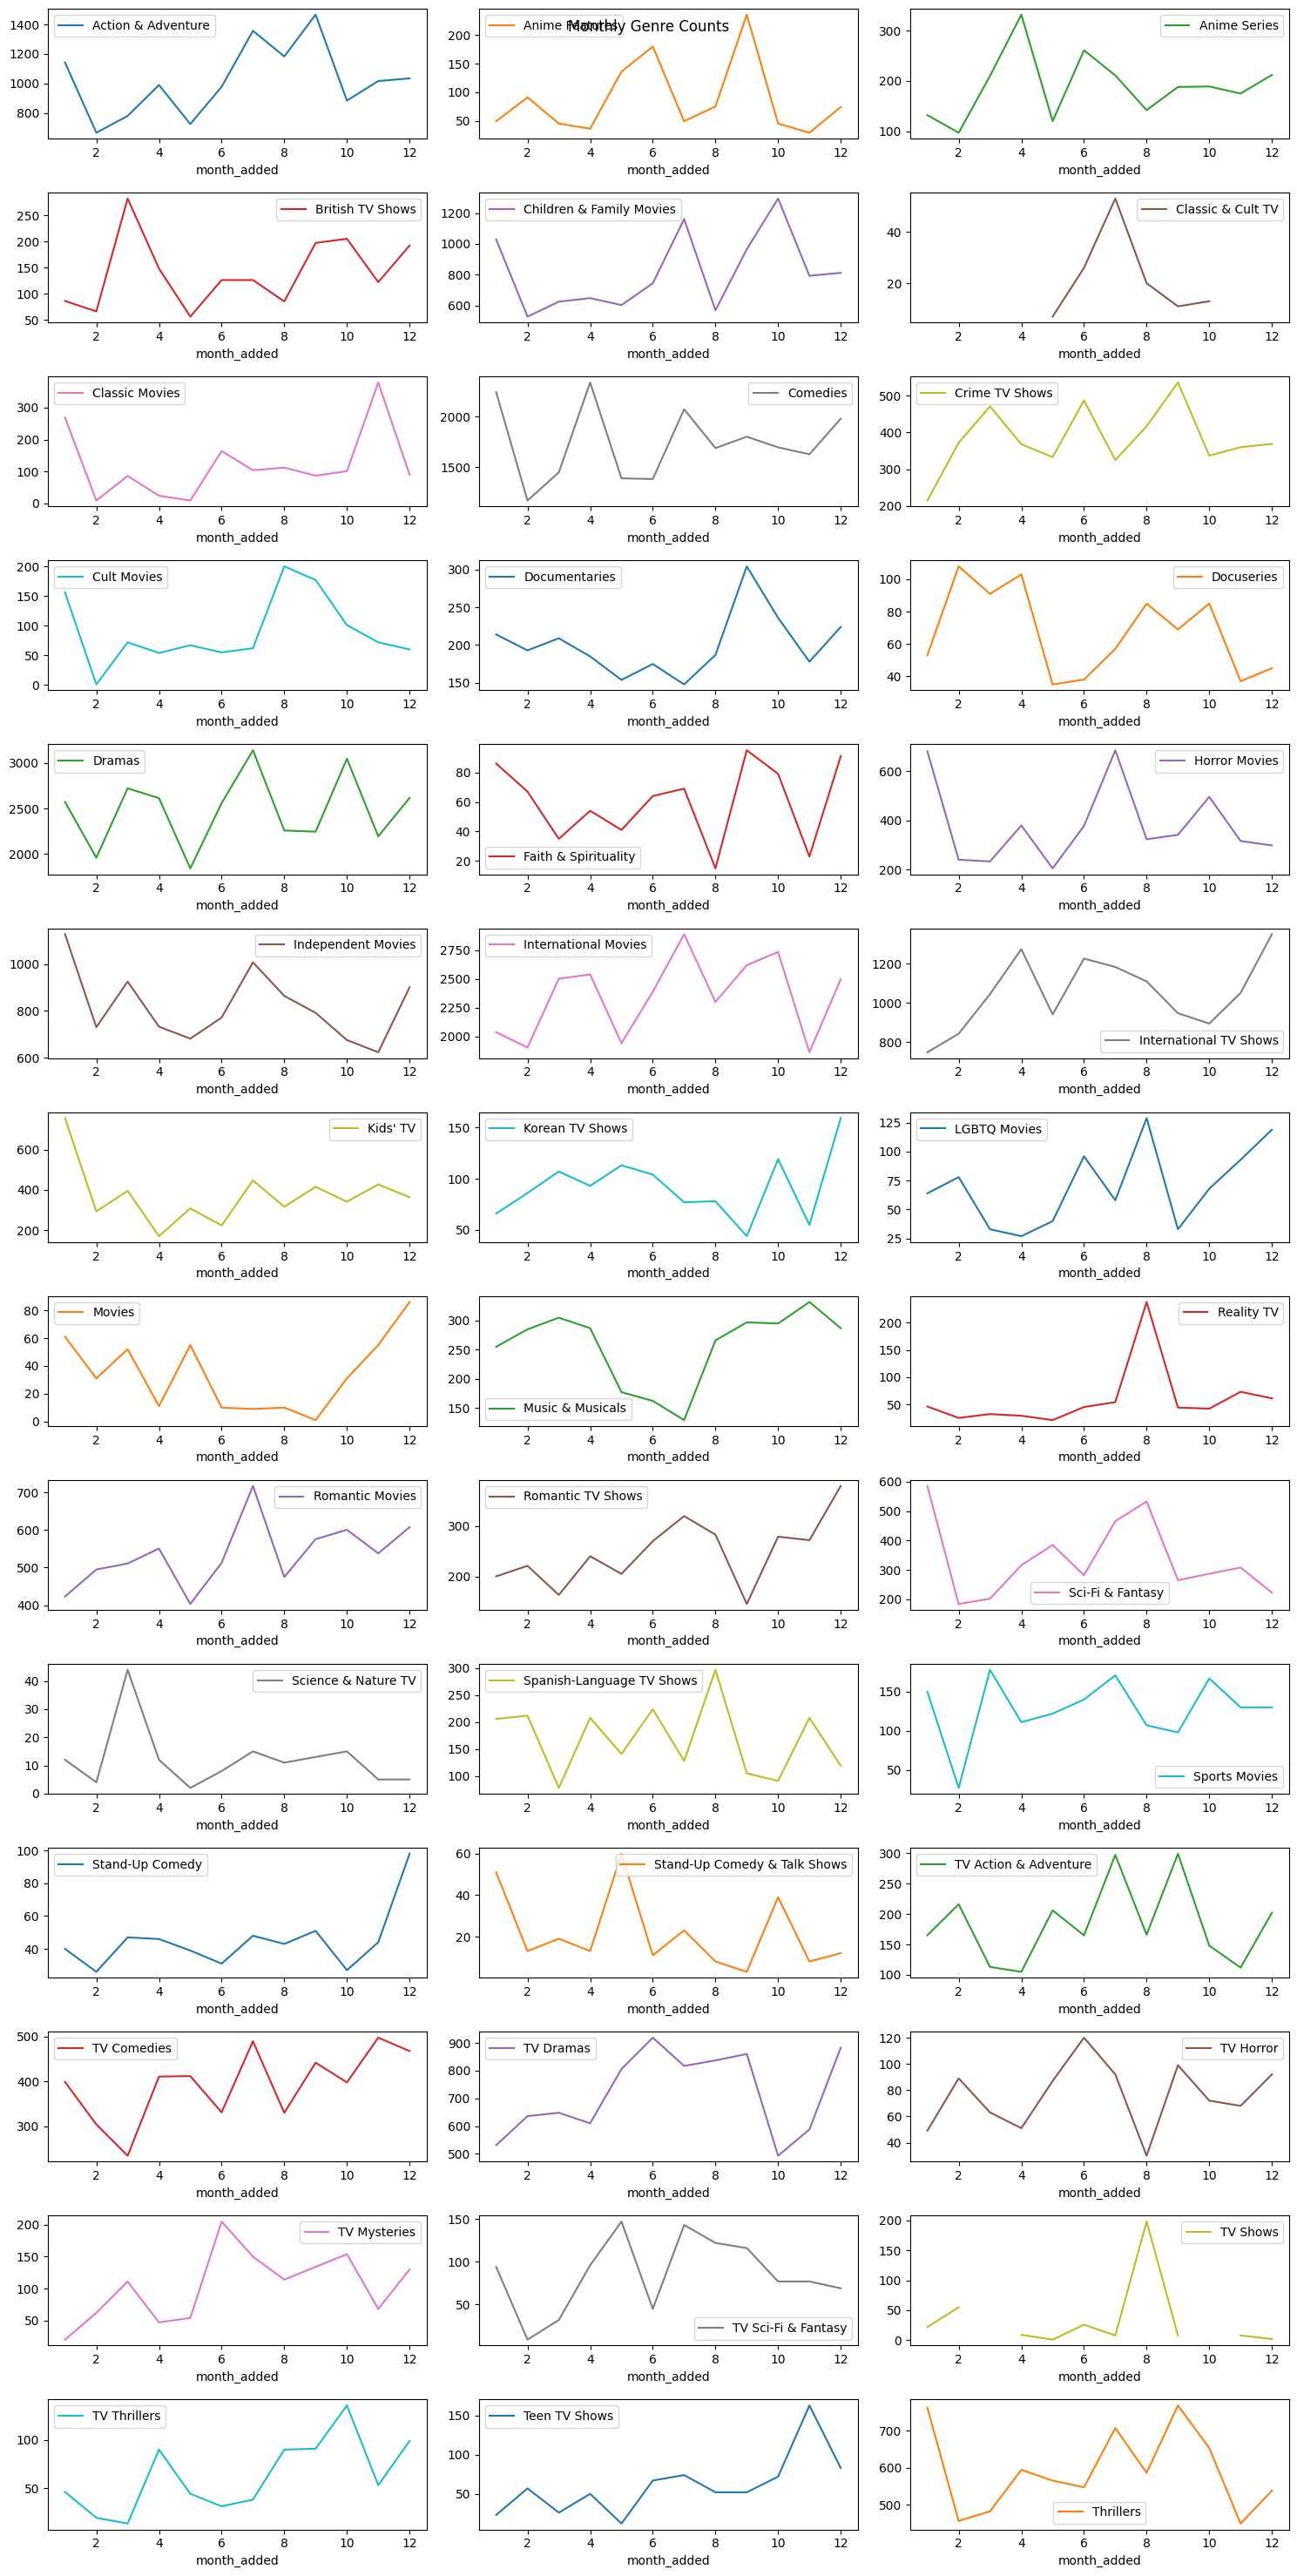

In [20]:
# Convert 'date_added' to datetime
df_merge['date_added'] = pd.to_datetime(df_merge['date_added'], errors='coerce')

# Extract month from 'date_added'
df_merge['month_added'] = df_merge['date_added'].dt.month

# Count the number of each genre by month
genre_counts = df_merge.groupby(['month_added', 'Genre']).size().unstack()

# Plot the results
genre_counts.plot(kind='line', subplots=True, layout=(-1, 3), figsize=(15, 30), sharex=False, title='Monthly Genre Counts')
plt.tight_layout()
plt.show()

# Text Analysis

## 1. Most Favorable Themes Over Time 

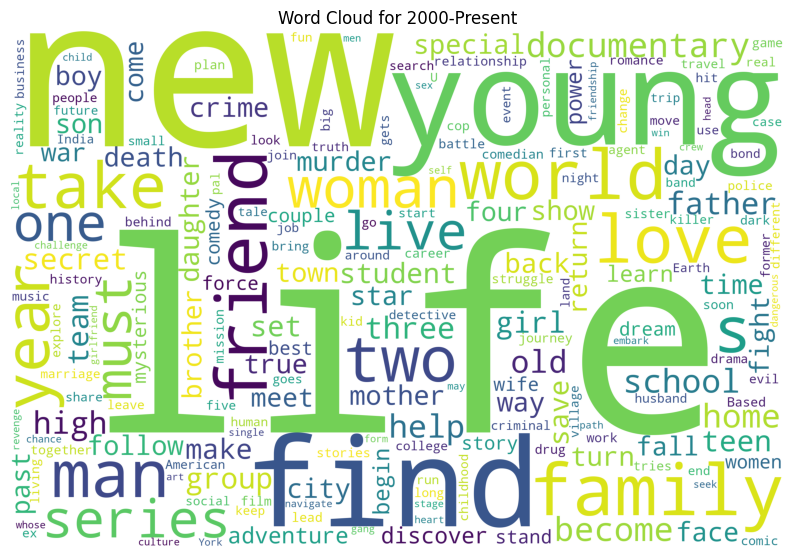

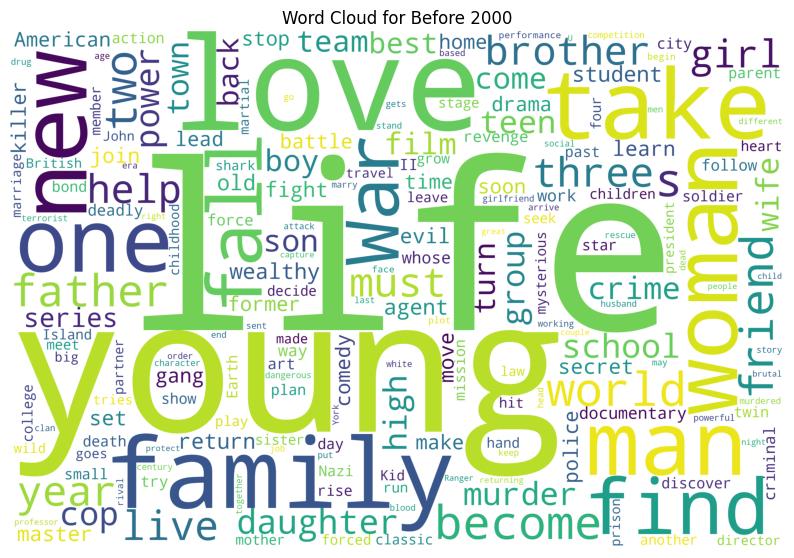

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Remove stopwords
stopwords = set(stopwords.words('english'))
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Aggregate descriptions from 2000-present and generate word cloud
text = ' '.join(df[df['release_year'] >= 2000]['description'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("Word Cloud for 2000-Present")
plt.show()

# Aggregate descriptions from before 2000 and generate word cloud
text = ' '.join(df[df['release_year'] < 2000]['description'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("Word Cloud for Before 2000")
plt.show()

## 2. Most Popular Plot Settings

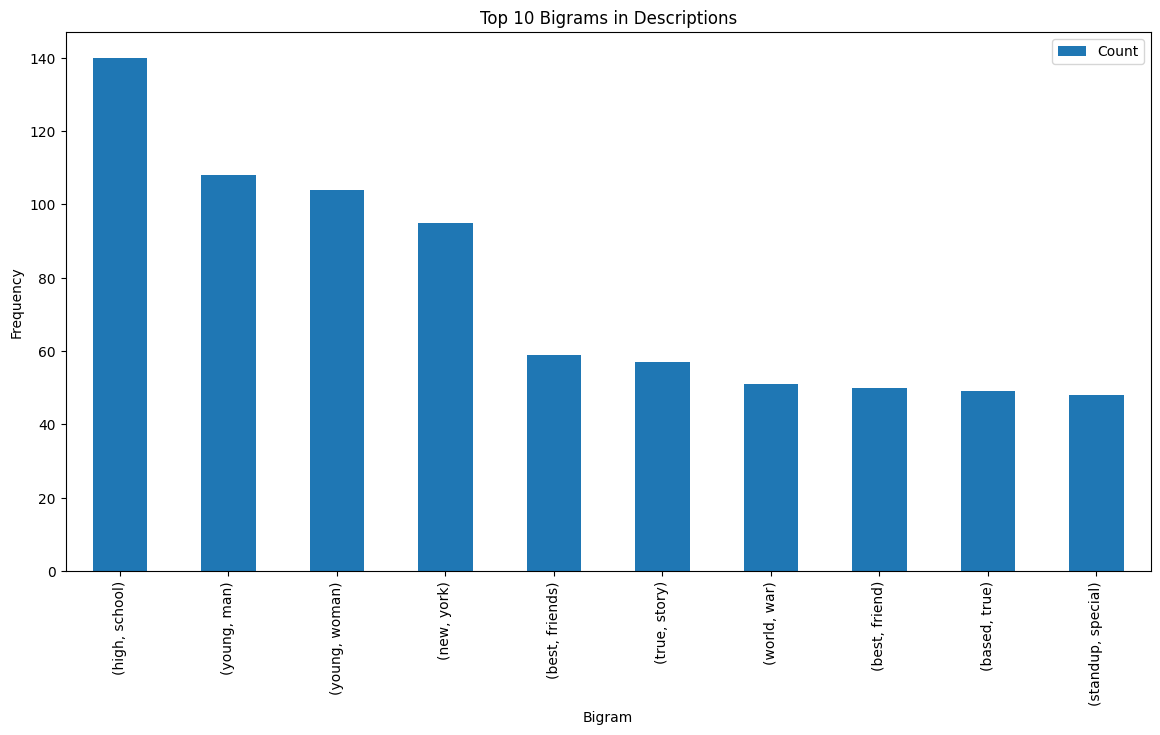

In [22]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize descriptions
def clean_tokenize(description):
    # Convert to lowercase and remove punctuation
    tokens = word_tokenize(description.lower().translate(str.maketrans('', '', string.punctuation)))
    return [t for t in tokens if t not in stop_words]

tokenized_descriptions = df['description'].dropna().apply(clean_tokenize)

# Extract bigrams 
bigrams = tokenized_descriptions.apply(lambda x: list(ngrams(x, 2)))

# Flatten the list of bigrams and count occurrences
bigram_counts = Counter(b for row in bigrams for b in row)

# Most common bigrams
top_bigrams = bigram_counts.most_common(10)

# Visualization
plt.figure(figsize=(14, 7))
pd.DataFrame(top_bigrams, columns=['Bigram', 'Count']).set_index('Bigram').plot(kind='bar', ax=plt.gca())
plt.title('Top 10 Bigrams in Descriptions')
plt.ylabel('Frequency')
plt.show()

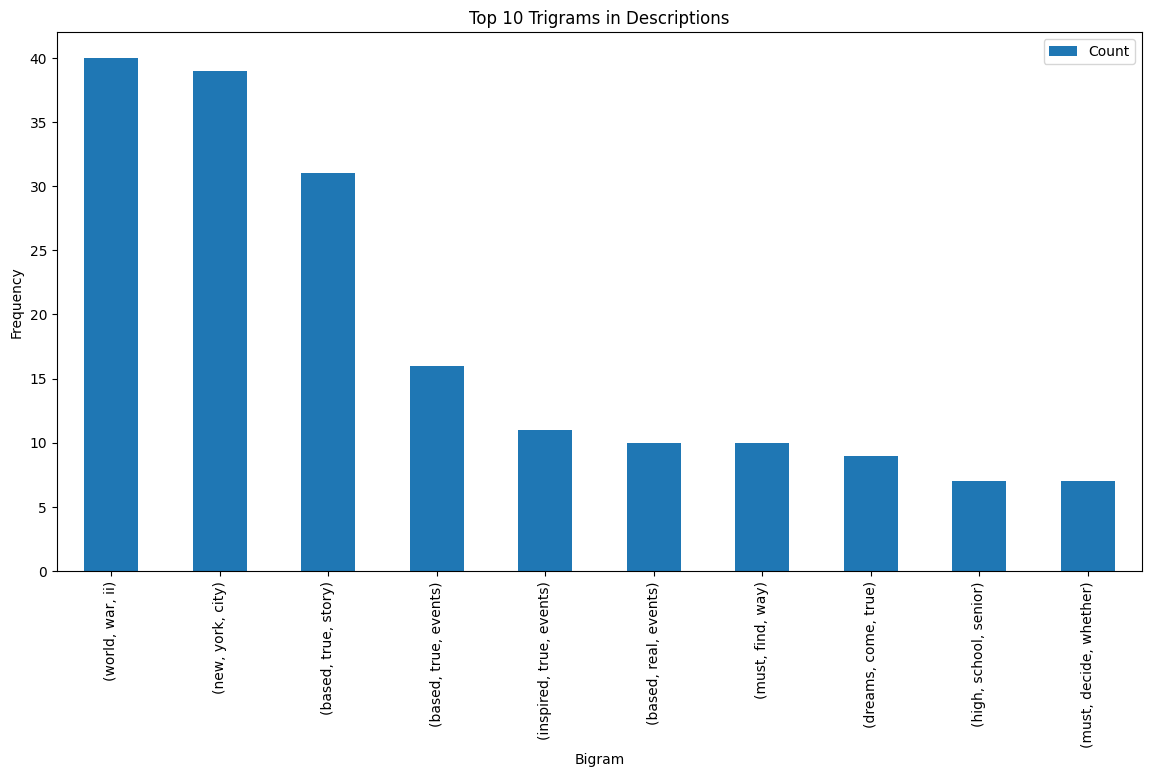

In [23]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize descriptions
def clean_tokenize(description):
    # Convert to lowercase and remove punctuation
    tokens = word_tokenize(description.lower().translate(str.maketrans('', '', string.punctuation)))
    return [t for t in tokens if t not in stop_words]

tokenized_descriptions = df['description'].dropna().apply(clean_tokenize)

# Extract bigrams 
bigrams = tokenized_descriptions.apply(lambda x: list(ngrams(x, 3)))

# Flatten the list of bigrams and count occurrences
bigram_counts = Counter(b for row in bigrams for b in row)

# Most common bigrams
top_bigrams = bigram_counts.most_common(10)

# Visualization
plt.figure(figsize=(14, 7))
pd.DataFrame(top_bigrams, columns=['Bigram', 'Count']).set_index('Bigram').plot(kind='bar', ax=plt.gca())
plt.title('Top 10 Trigrams in Descriptions')
plt.ylabel('Frequency')
plt.show()